In [ ]:
!pip install tesseract
!pip install pytesseract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562552 sha256=c7984f84f6418fcfa8186a3d78559746fd0a6814a17ec86583ed9c7975f240b7
  Stored in directory: /root/.cache/pip/wheels/71/c9/aa/698c579693e83fdda9ad6d6f0d8f61ed986e27925ef576f109
Successfully built tesseract


In [ ]:
!apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (5,555 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121753 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [ ]:
!pip install pdf2image
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.3 [186 kB]
Fetched 186 kB in 0s (420 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 121800 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.3_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.3) ...
Setting up poppler-utils (22.02.0-2ubuntu0.3) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
from pdf2image import convert_from_path

# Replace 'input_file.pdf' with the path to your PDF file
pdf_file = '/content/Biology2018.pdf'
pages = convert_from_path(pdf_file)

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


def deskew(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)
    coords = np.column_stack(np.where(gray > 0))
    angle = cv2.minAreaRect(coords)[-1]

    # if angle < -45:
    #     angle = -(90 + angle)
    # else:
    #     angle = -angle

    # # Ensure that the angle is such that vertical lines become perfectly vertical
    # if angle > 0:
    #     angle -= 90

    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    cv2_imshow(rotated)

In [ ]:
from google.colab.patches import cv2_imshow
def splitImage(image):

# Load the image

  # Get the height and width of the image
  height, width, _ = image.shape
  print(height, width)

  # Calculate the center of the image
  center_x, center_y = width // 2-20, height // 2

  # Divide the image into two parts at the center
  left_half = image[:, :center_x, :]

  cv2_imshow(image)
  cv2_imshow(left_half)



2339 1654


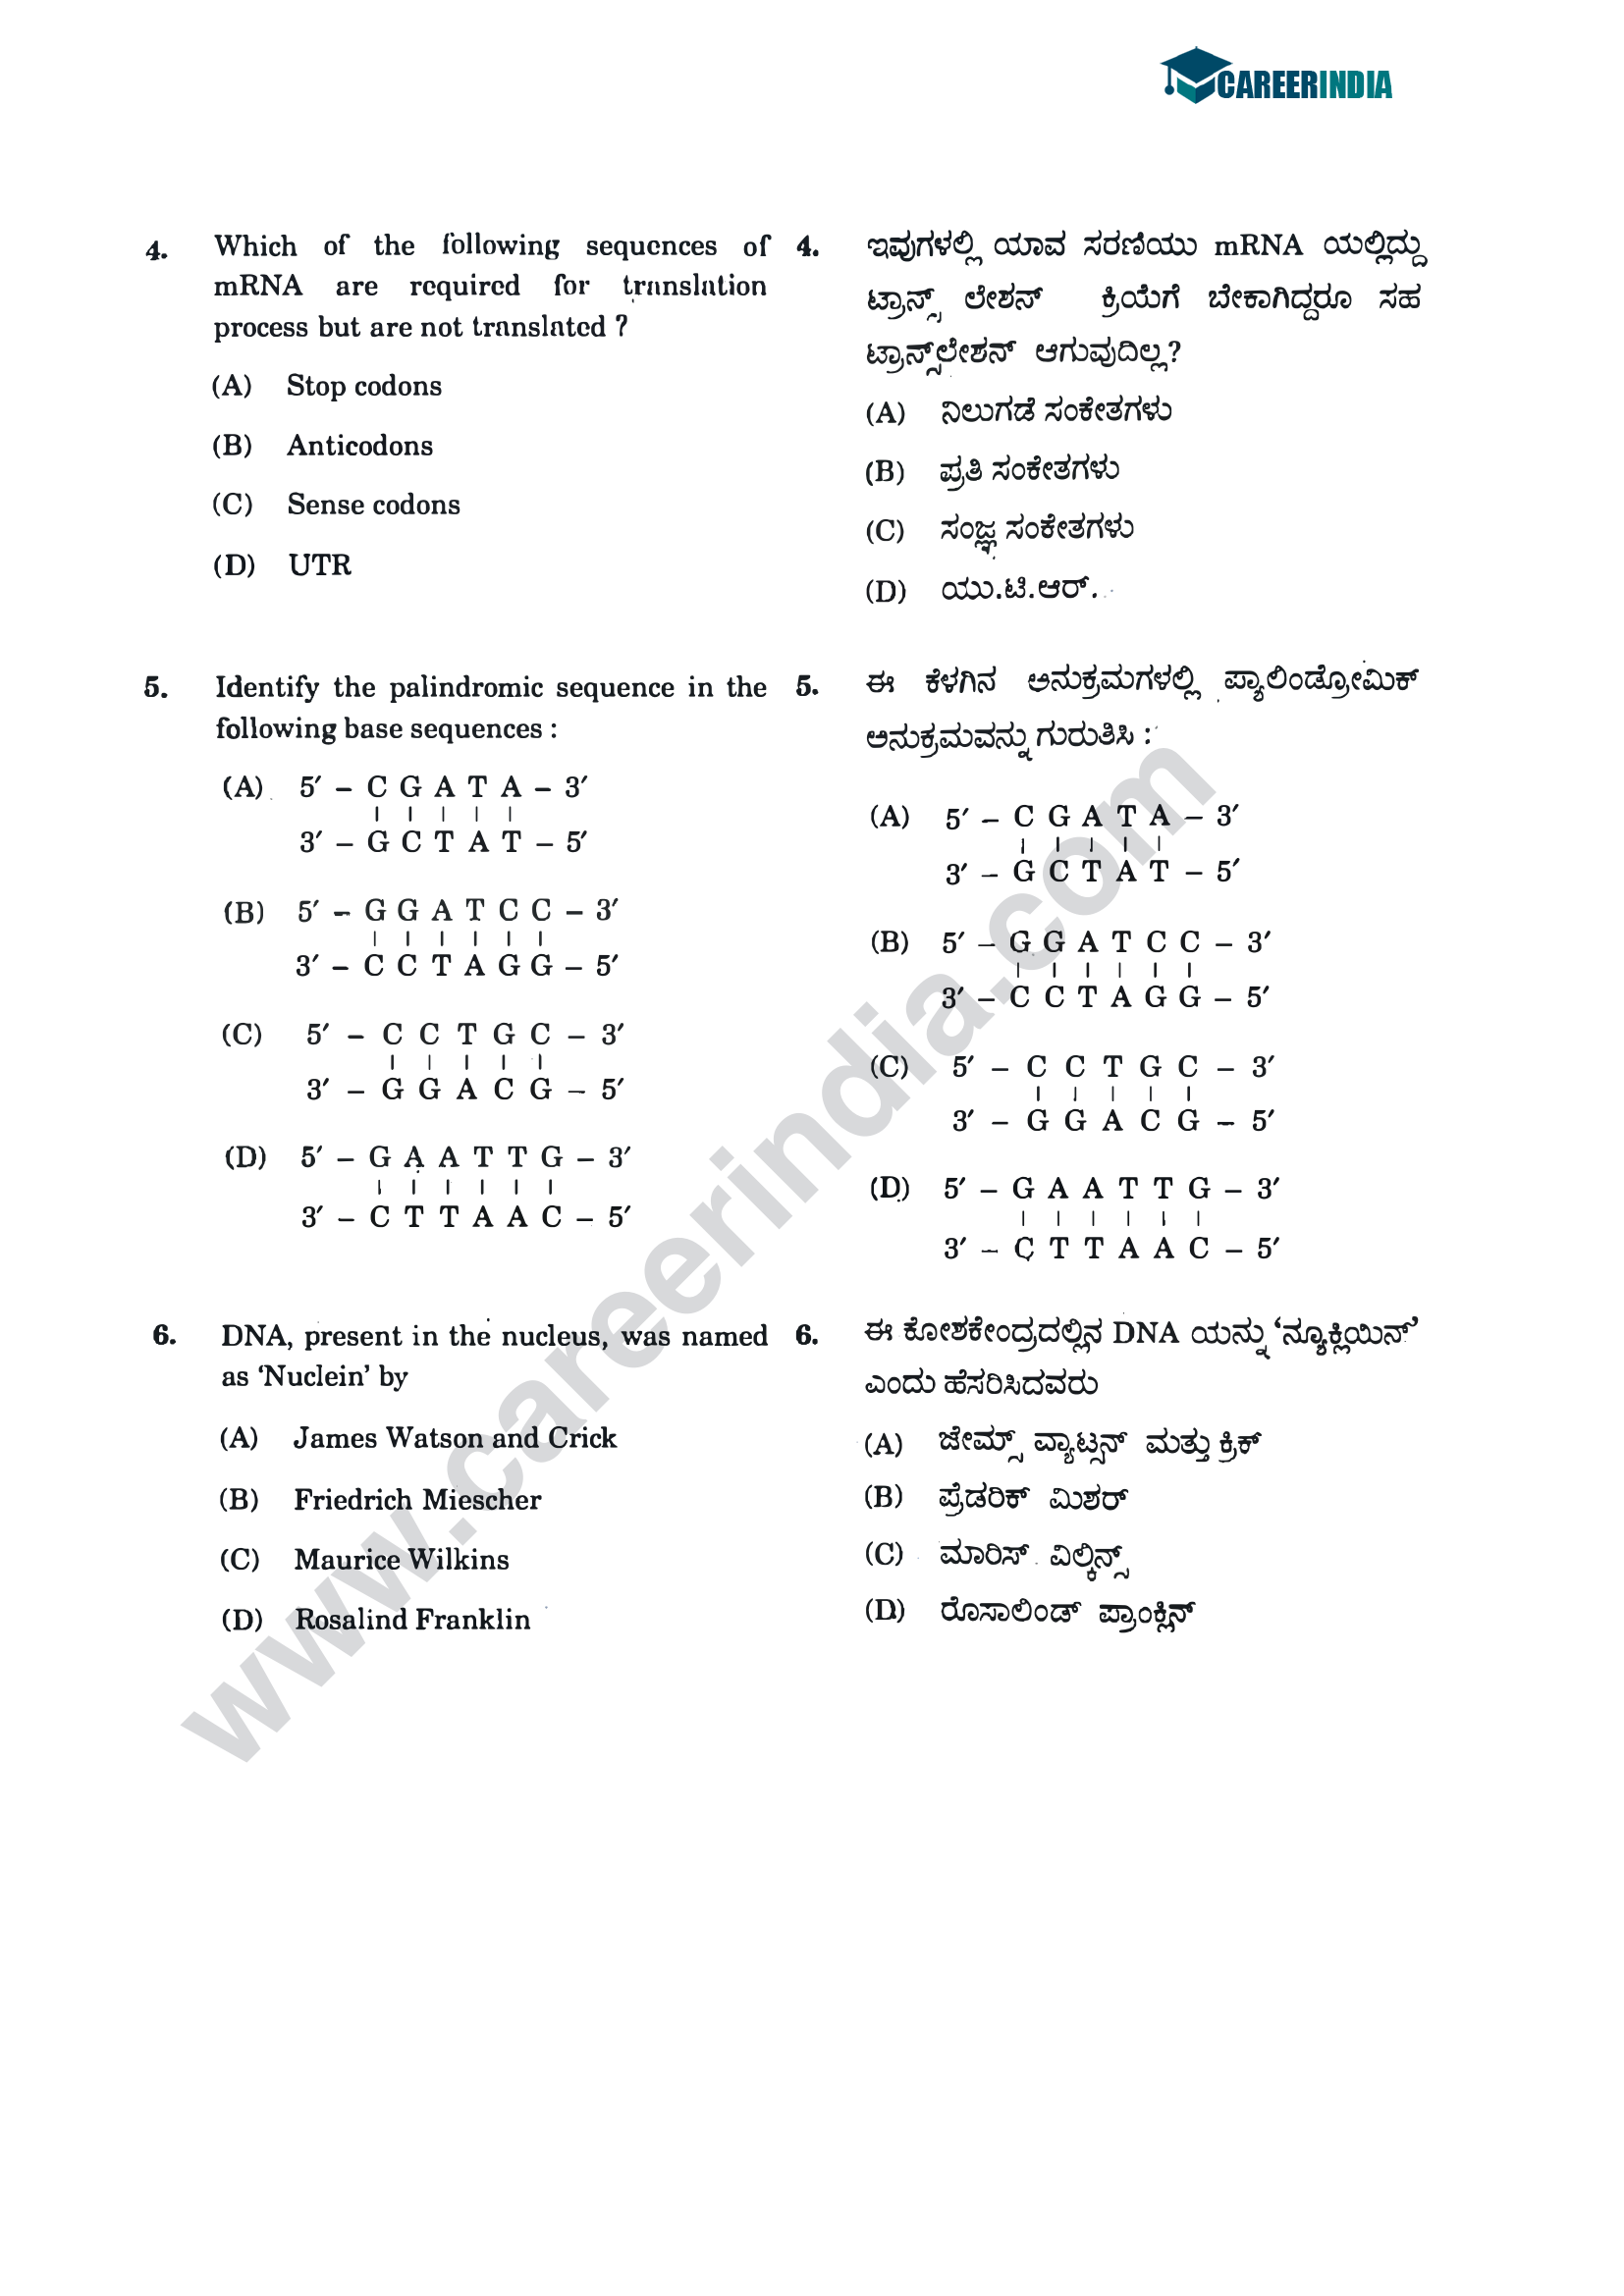

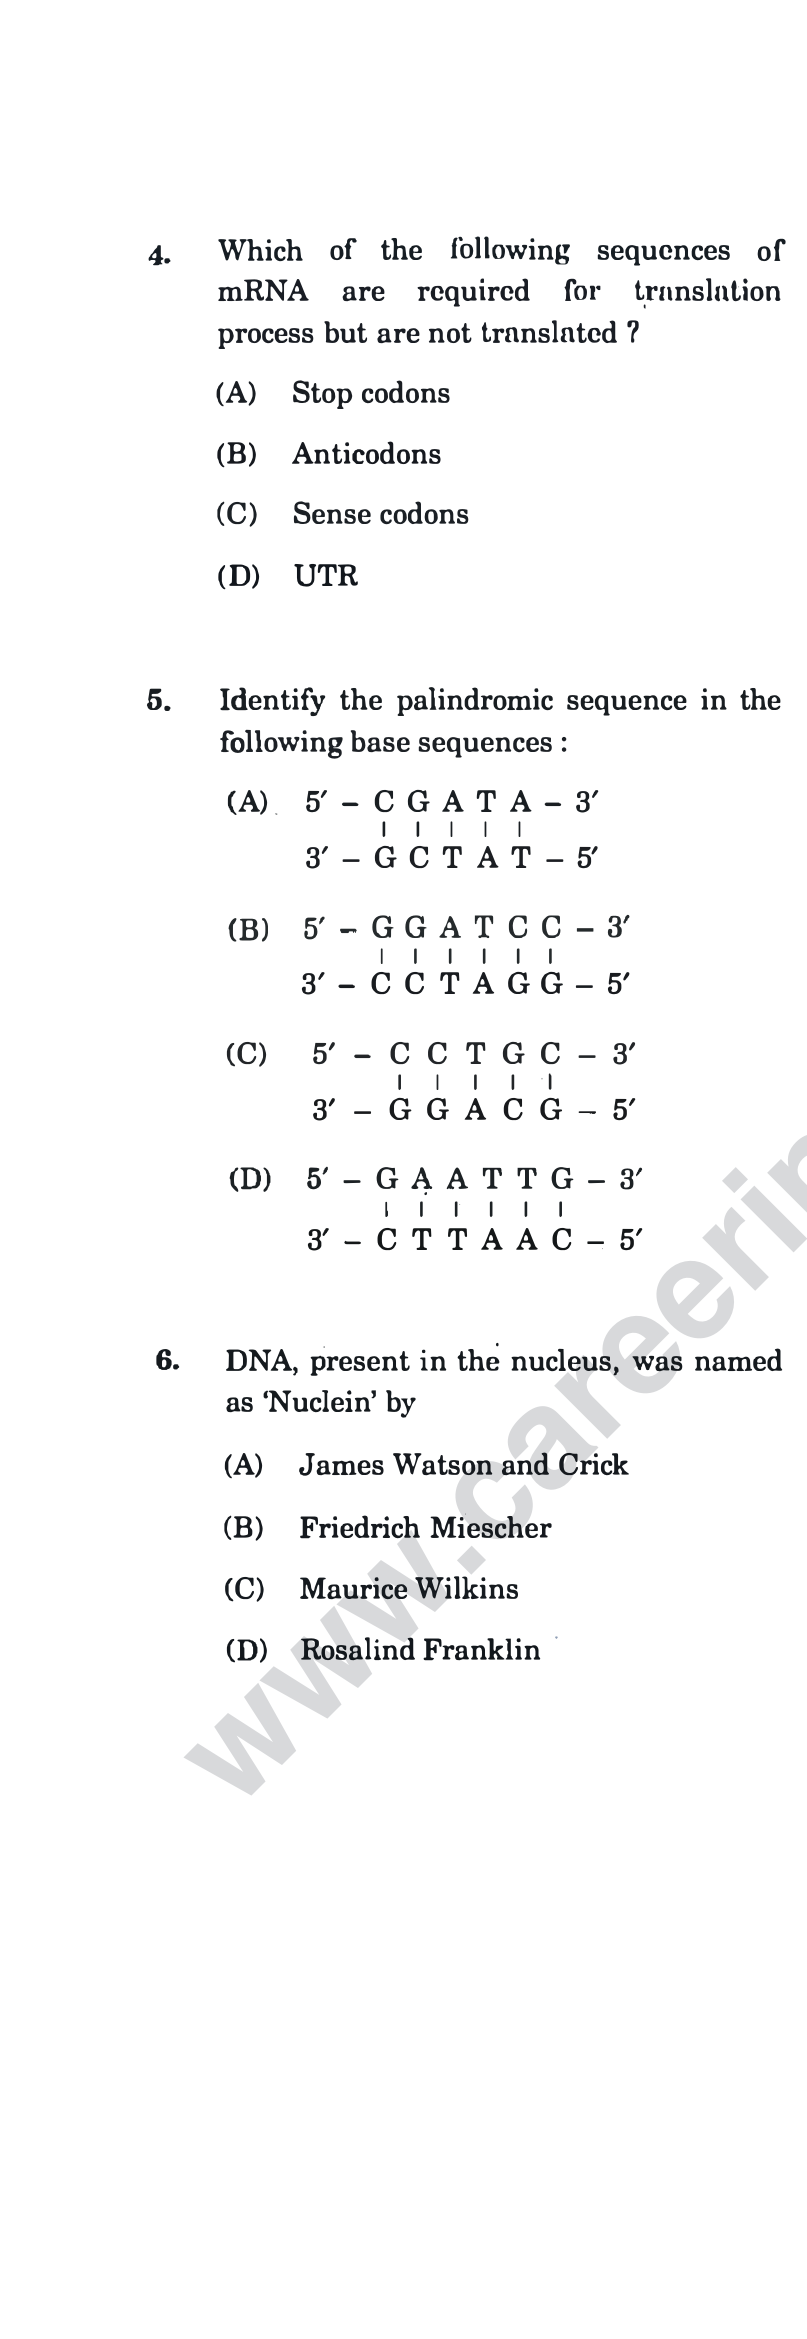

In [ ]:
opencv_image = cv2.cvtColor(np.array(pages[2]), cv2.COLOR_RGB2BGR)
splitImage(opencv_image)

In [ ]:
import pytesseract

def extract_text_from_image(image):
    text = pytesseract.image_to_string(image)
    return text

In [ ]:
# Assuming you have a function called `extract_text_from_image` that extracts text from an image
# and a list of `pages` containing image data

# Initialize an empty list to store extracted text
extracted_text = []

# Loop through each page (excluding the first page and last 3 pages)
for index, page in enumerate(pages[1:-3]):
    # Extract text from the left half of the page
    height, width, _ = np.array(page).shape
    center_x = width // 2
    left_half = np.array(page)[:, :center_x, :]
    text = extract_text_from_image(left_half)
    extracted_text.append(text)

# Convert the list of extracted text to a single string
final_text_ocr = '\n'.join(extracted_text)

# Print the final concatenated text
print(final_text_ocr)


1, Find the nucleotide sequence of the 1.
mRNA which codes for the sequence of

amino acids —
‘Met — Leu - Val — Arg — Ala’ and
choose the correct option from below :

(A) AUG -GAU - GAA - UAU - UGU
(B) AUG ~GAU - GAA - CGU - GCC

(C) AUG -CUA -GUG - UAU - UGU
(D) AUG - CUA - GUG - CGU - GCC

2. Sickle-cell anaemia is due to the following
mutant gene:

(A) CTC-CAC

(B) CTC-GAG
(C) CAC-GUG
(D) GAG-GUG

8. In the given transcription unit, identify 3,
the regions I and II respectively.

‘ Coding strand
3 EEE

FER)
5 SEY Template strand 3
(A) Promoter and Terminator
(B) Rho factor and Sigma factor
(C) Terminator and Promoter

(D) Operator and Inhibitor

Which of the following sequences of 4
mRNA are required for translation
process but are not translated ?

(A) Stop codons
(B) Anticodons
(C) Sense codons

(D) UTR

Identify the palindromic sequence in the 5
following base sequences :
(A) 5 -CGATA-3’

rrr
3 -GCTAT-95

(B) 5 -GGATCC-3
Iobototde

3 -CCTAGG-5

() & -CCTGC-93
1orotuto

3” -GGAC